In [1]:
# The data is queried from Google Big querry NY_city bike data
# citibike_all.csv only contains the tripduration, but all the 58 M rows
# citibike_5M.csv contains all the columns but randomly choose 5 M row from the 58 M rows.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# load df_all creatime datetime index
df_all = pd.read_csv('citibike_all.csv')
df_all.starttime = pd.to_datetime(df_all.starttime)
df_all.dropna(inplace=True)

C:\Softwares\Anaconda_install\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_all.index = df_all['starttime']
del df_all['starttime']

In [4]:
# sort datetime
df_all.sort_index(inplace=True)

In [5]:
df_month = df_all.groupby(pd.Grouper(freq="M"))

In [6]:
df_month.count()

,tripduration
starttime,
2013-07-31,843416
2013-08-31,1001958
2013-09-30,1034359
2013-10-31,1037712
2013-11-30,675774
2013-12-31,443966
2014-01-31,300400
2014-02-28,224736
2014-03-31,439117


In [8]:
# some months in 2016-10 and 2017-3 have 0 record, drop them
df_month_drop = pd.DataFrame(df_month.count())
df_month_drop = df_month_drop[df_month_drop['tripduration']!=0]
df_month_drop.columns = ['Ride numbers']


<Figure size 2880x1440 with 0 Axes>

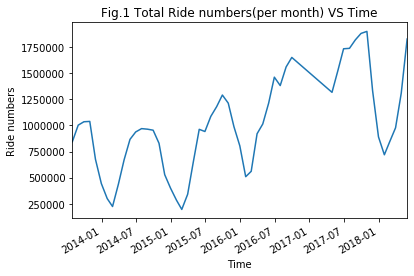

In [11]:
plt.figure(figsize=(40,20))
df_month_drop.plot(legend=None)
plt.xlabel('Time')
plt.ylabel('Ride numbers')
plt.title('Fig.1 Total Ride numbers(per month) VS Time')
plt.show()

The overall ride numbers per month increase for the past 5 years gradually, however the ride numbers have oscillations every year.
We can plot the ride number within each year to see the oscillation more clearly later

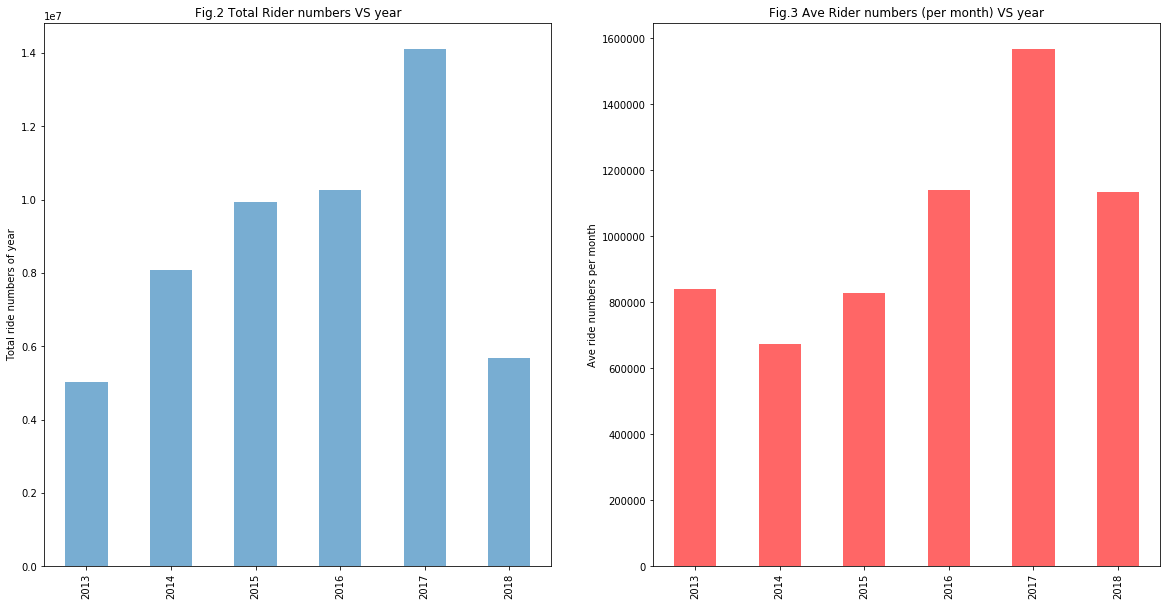

In [13]:
# plot the total ride numders each year and the ride numbers per month of each year
pv3 = df_all.resample('Y').count().tripduration
pv3 = pd.DataFrame(pv3)
pv3['#ofmonth'] = [6,12,12,9,9,5]
pv3['rides per month'] = pv3['tripduration']/pv3['#ofmonth']
pv3.index=['2013','2014','2015','2016','2017','2018']


plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title('Fig.2 Total Rider numbers VS year')
pv3.tripduration.plot(kind='bar',alpha=0.6)
plt.ylabel('Total ride numbers of year')

plt.subplot(122)
pv3['rides per month'].plot(kind='bar',color='r',alpha=0.6)
plt.title('Fig.3 Ave Rider numbers (per month) VS year')
plt.ylabel('Ave ride numbers per month')

plt.show()


The Citibike business is growing considering the overall rides per year or in terms of the ave ride numbers per month within each year. Even doubled from 2014 to 2017 (The 2018 data may have some problem, probably the dataset in that year is not complete)

In [14]:
# Now we try to see how the month dependent oscillation patterns are within each year
pv3['rides per month'] = pv3['tripduration']/pv3['#ofmonth']

In [15]:
pv = pd.pivot_table(df_month_drop, index=df_month_drop.index.month, columns=df_month_drop.index.year,
                    values='Ride numbers')

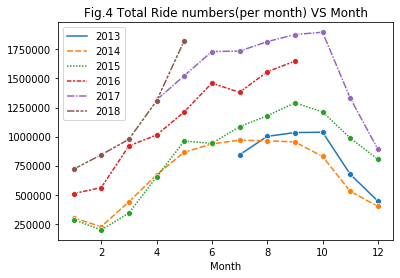

In [19]:
#plot rider number VS month in different years
sns.lineplot(data=pv,marker='o')
plt.xlabel('Month')
plt.title('Fig.4 Total Ride numbers(per month) VS Month')
plt.show()


WE can see that the oscillation patterns are similar across differert years. Consider the climate in NY, this is due to the weather change between
months. In the summer, there are more people willing to ride bike compared to the winter. 

In [17]:
#plot ride numbers at each hours in different month
df_all.resample('H').count()

pv2 = pd.pivot_table(df_all.resample('H').count(), index=df_all.resample('H').count().index.hour, columns=df_all.resample('H').count().index.month,
                    values='tripduration',aggfunc='sum')
pv2.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 

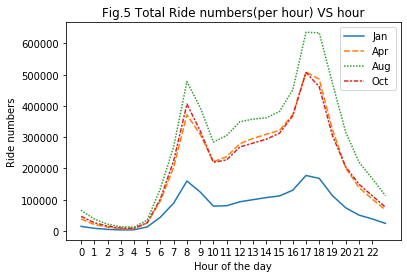

In [20]:
sns.lineplot(data=pv2[['Jan','Apr','Aug','Oct']])
plt.xlabel('Hour of the day')
plt.ylabel('Ride numbers')
plt.title('Fig.5 Total Ride numbers(per hour) VS hour')
plt.xticks(np.arange(23))
plt.show()

There are two peak time each day: ~8:00, and 18:00, from people going to work and off work. We can consider these two time periods as peak hours
In Jan, people do not intend to ride to work because of the weather, there is even very little difference between peak hours and off peak hours compared to summer months

In [21]:
# create day of week column
df_all['DayofWeek'] = df_all.index.weekday_name

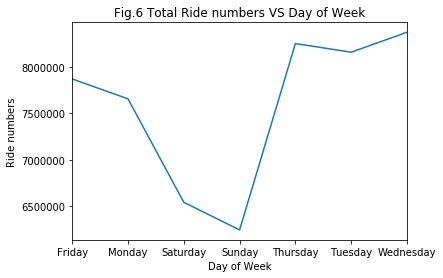

In [22]:
# plot day of week dependence
df_all.groupby('DayofWeek').count().plot(legend=None)
plt.xlabel('Day of Week')
plt.ylabel('Ride numbers')
plt.title('Fig.6 Total Ride numbers VS Day of Week')
plt.show()

Seems on the weekend, the ride numbers drop a lot, meaning large portions of the ride are from daily commute for those who work in NYC

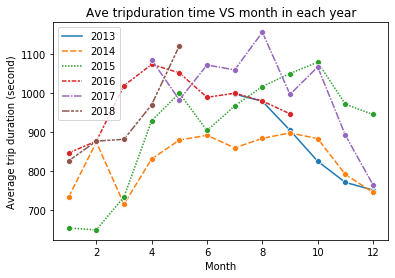

In [24]:
# Now start to analysis the tripduration time
pv4 = pd.pivot_table(df_all.resample('M').mean(), index=df_all.resample('M').mean().index.month,columns=df_all.resample('M').mean().index.year, values='tripduration')

sns.lineplot(data=pv4,marker='o')
plt.xlabel('Month')
plt.ylabel('Average trip duration (second)')
plt.title('Fig.7 Ave tripduration time VS month in each year')
plt.show()

We can see that in 2015, the ave trip duration in Jan and Feb are exemtremly low, maybe the weather is too cold (Check the history weather report later, it was historically cold!!). The begining months of 2018 is are lot better. 
In the summer months in 2017, the ave trip duration is higher, maybe that summer in NYC was not that shiny.
The tripduration in 2014 are more or less consistant, not too much change among different months

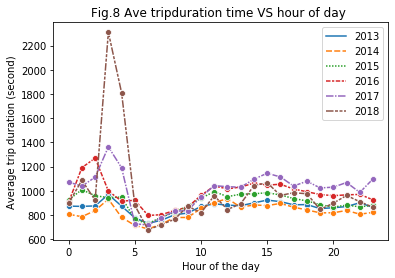

In [25]:
pv5 = pd.pivot_table(df_all.resample('H').mean(), index=df_all.resample('H').mean().index.hour,columns=df_all.resample('H').mean().index.year, values='tripduration')
sns.lineplot(data=pv5,marker='o')
plt.xlabel('Hour of the day')
plt.ylabel('Average trip duration (second)')
plt.title('Fig.8 Ave tripduration time VS hour of day ')
plt.show()
# looks somthing wrong with the 2018 data,drop it and replot

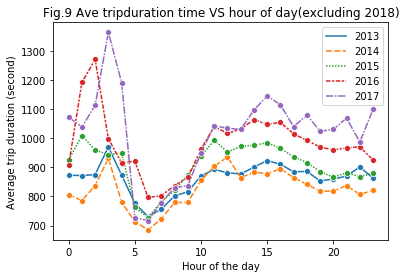

In [26]:
# plot the tripduration VS hour of the day
pv5_drop = pv5.drop(pv5.columns[5],axis=1)
sns.lineplot(data=pv5_drop,marker='o')
plt.xlabel('Hour of the day')
plt.ylabel('Average trip duration (second)')
plt.title('Fig.9 Ave tripduration time VS hour of day(excluding 2018)')
plt.show()


Interesting, at from 0-5am, people spend longer ave trip time. Maybe get drunk??

#############################################################3
# Now start to work on the 5M_random data

In [27]:
df_5M = pd.read_csv('citybike_5M.csv')

In [28]:
df_5M.head()

,tripduration,starttime,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,usertype,birth_year,gender
0,386,2016-01-31 15:55:13,40.702551,-74.012723,40.708347,-74.017134,Subscriber,1952,male
1,866,2016-06-14 13:37:31,40.715338,-74.016584,40.708621,-74.007222,Subscriber,1899,male
2,723,2016-01-07 09:21:42,40.731724,-74.006744,40.716021,-73.999744,Subscriber,1950,male
3,736,2017-07-25 10:29:00,40.768254,-73.988639,40.757973,-73.966033,Subscriber,1998,male
4,230,2014-08-10 18:12:41,40.716250,-74.009106,40.715422,-74.011220,Subscriber,1948,female


In [29]:
df_5M.isnull().sum()

tripduration               0
starttime                  0
start_station_latitude     0
start_station_longitude    0
end_station_latitude       0
end_station_longitude      0
usertype                   0
birth_year                 0
gender                     0
dtype: int64

No null values, good! Now lets look at the usertype, gender, and birth_year distribution. For birth year, we need to convert to Ages, since in different years, the birth year means different.
Before doing so, we need to set starttime as the datetime index

In [30]:
df_5M.starttime = pd.to_datetime(df_5M.starttime)
df_5M.index = df_5M['starttime']
del df_5M['starttime']

Create a colums age

In [31]:
df_5M['age'] = df_5M.index.year - df_5M.birth_year

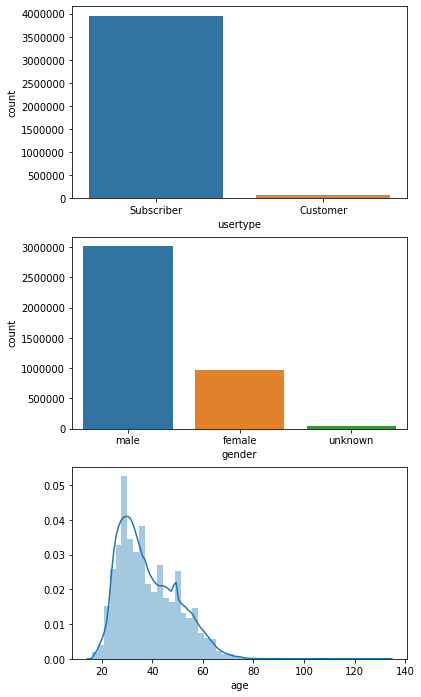

In [32]:
plt.figure(figsize=(6,12))
plt.subplot(311)
sns.countplot(data=df_5M,x='usertype')
plt.subplot(312)
sns.countplot(data=df_5M,x='gender')
plt.subplot(313)
sns.distplot(df_5M.age)
plt.show()

There are way more rides from subscribers than customers. Most subscribers are local employees working in NYC, who need to ride very often. Thosse customers are mostly visitors only trying citibike once or twice.
More male riders than female riders. Most rider are below 40 years old

In [33]:
df_5M.groupby('usertype').mean()

,tripduration,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,birth_year,age
usertype,,,,,,,
Customer,3886.371330,40.739489,-73.983401,40.738511,-73.982804,1977.620822,39.938086
Subscriber,800.699112,40.736183,-73.987186,40.735807,-73.987272,1977.473601,38.232733


Now lets look at the mean of the trip duration. Interstingly, custormers spend more time per trip compared to subscribers (almost 5 times!)! I think the reason is that coustomers are visotors to NYC, generally they would spend more time exploring the city compared to Subscribers who just use citibike to commute.

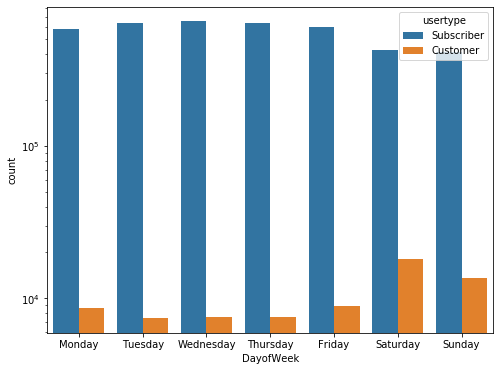

In [35]:
df_5M['DayofWeek'] = df_5M.index.weekday_name
df_temp = df_5M[['usertype','DayofWeek']]
plt.figure(figsize=(8,6))
sns.countplot(data=df_temp,x='DayofWeek',hue='usertype',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.yscale('log')

plt.show()

Now let look at another countplot on how many customers/subscriber would take a ride on weekdays or weekends. I seems that Subscribers take more ride on Weekdays, and Customers take more on Weekends. Make sense! Customers travel on the weekends.

Now lets start to look at the location of the rides

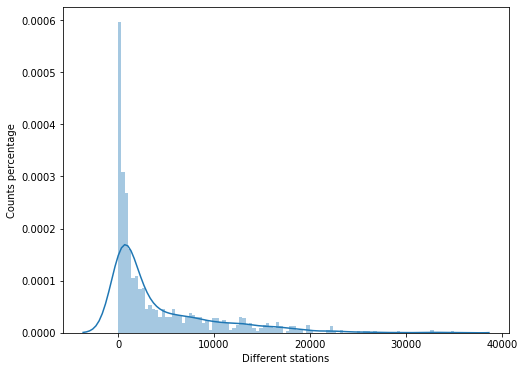

In [10]:
plt.figure(figsize=(8,6))
sns.distplot(df_5M.start_station_latitude.value_counts(),bins=100)
plt.xlabel('Different stations')
plt.ylabel('Counts percentage')
plt.show()

We can see the rides among differnt stations are highly location dependent. A few stations take most of the rides.

In [36]:
# Now we try to plot a scatterplot about how many rides are at the start station and end station, first we try to plot the total counts in this 
# dataframe, remember this is only a 5M sample from the total, but can still give some hint.
#creat df for start station
aa = pd.DataFrame(df_5M.start_station_latitude.value_counts())
aa.reset_index(inplace=True)
bb = pd.DataFrame(df_5M.start_station_longitude.value_counts())
bb.reset_index(inplace=True)
(aa.start_station_latitude!=bb.start_station_longitude).sum()

0

The start_latitude, longitude match well

In [37]:
aa.columns=['latitude','counts']
bb.columns=['longitude','counts']

In [38]:
df_start_station = pd.concat([aa,bb.longitude],axis=1)


In [39]:
condition = (df_start_station.latitude>40.495592)&(df_start_station.latitude<40.915568)&(df_start_station.longitude>-74.257159)&(df_start_station.longitude<-73.699215)

In [40]:
# create df for end station
cc = pd.DataFrame(df_5M.end_station_latitude.value_counts())
cc.reset_index(inplace=True)
dd = pd.DataFrame(df_5M.end_station_longitude.value_counts())
dd.reset_index(inplace=True)

cc.columns=['latitude','counts']
dd.columns=['longitude','counts']
df_end_station = pd.concat([cc,dd.longitude],axis=1)
condition = (df_end_station.latitude>40.495592)&(df_end_station.latitude<40.915568)&(df_end_station.longitude>-74.257159)&(df_end_station.longitude<-73.699215)

C:\Softwares\Anaconda_install\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


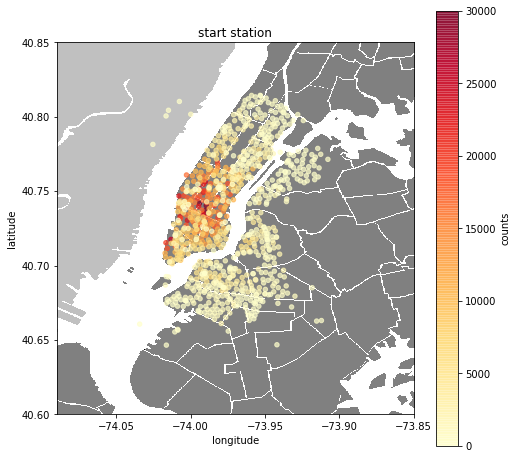

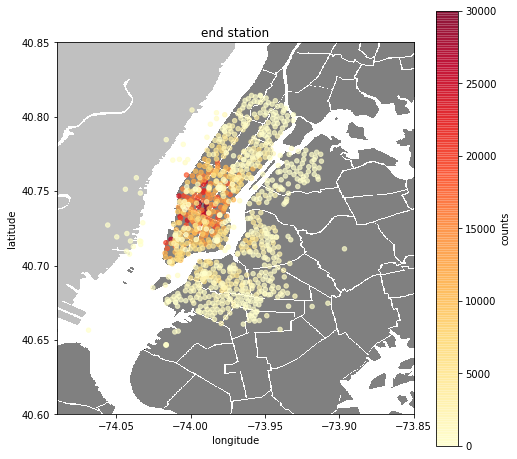

In [41]:

import urllib
plt.figure(figsize=(8,8))

i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
NYC_image = plt.imread(i)

plt.imshow(NYC_image,extent=[-74.254159, -73.696215, 40.493992, 40.913568])
ax = plt.gca()

mynorm1 = plt.Normalize(vmin=0, vmax=30000)
df_start_station[condition].plot(kind='scatter',x='longitude', y='latitude',c='counts',cmap='YlOrRd',ax=ax,alpha=0.7,norm=mynorm1)
plt.title('start station')
plt.xlim(-74.09,-73.85)
plt.ylim(40.60,40.85)
plt.show()

plt.figure(figsize=(8,8))
i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
NYC_image = plt.imread(i)

plt.imshow(NYC_image,extent=[-74.254159, -73.696215, 40.493992, 40.913568])
bx = plt.gca()

mynorm1 = plt.Normalize(vmin=0, vmax=30000)
df_end_station[condition].plot(kind='scatter',x='longitude', y='latitude',c='counts',cmap='YlOrRd',ax=bx,alpha=0.7,norm=mynorm1)
plt.title('end station')
plt.xlim(-74.09,-73.85)
plt.ylim(40.60,40.85)
plt.show()





We can see the the start/end station which with most rides are both at Manhatthon. What if we try to see different work days?

In [42]:
# create df for start station on Weekdays between 6am and 10 am
df_5M_Weekdays_Morning_end = df_5M.loc[df_5M.DayofWeek.isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])].between_time('6:00', '10:00')
ee = pd.DataFrame(df_5M_Weekdays_Morning_end.end_station_latitude.value_counts())
ee.reset_index(inplace=True)
ff = pd.DataFrame(df_5M_Weekdays_Morning_end.end_station_longitude.value_counts())
ff.reset_index(inplace=True)

ee.columns=['latitude','counts']
ff.columns=['longitude','counts']
df_5M_Weekdays_Morning_end_cts = pd.concat([ee,ff.longitude],axis=1)
condition = (df_5M_Weekdays_Morning_end_cts.latitude>40.495592)&(df_5M_Weekdays_Morning_end_cts.latitude<40.915568)&(df_5M_Weekdays_Morning_end_cts.longitude>-74.257159)&(df_5M_Weekdays_Morning_end_cts.longitude<-73.699215)

#create df for end station on weekdays   between 5pm and 9pm
df_5M_Weekdays_Evening_end = df_5M.loc[df_5M.DayofWeek.isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])].between_time('17:00', '21:00')
gg = pd.DataFrame(df_5M_Weekdays_Evening_end.end_station_latitude.value_counts())
gg.reset_index(inplace=True)
hh = pd.DataFrame(df_5M_Weekdays_Evening_end.end_station_longitude.value_counts())
hh.reset_index(inplace=True)

gg.columns=['latitude','counts']
hh.columns=['longitude','counts']
df_5M_Weekdays_Evening_end_cts = pd.concat([gg,hh.longitude],axis=1)
condition = (df_5M_Weekdays_Evening_end_cts.latitude>40.495592)&(df_5M_Weekdays_Evening_end_cts.latitude<40.915568)&(df_5M_Weekdays_Evening_end_cts.longitude>-74.257159)&(df_5M_Weekdays_Evening_end_cts.longitude<-73.699215)

C:\Softwares\Anaconda_install\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


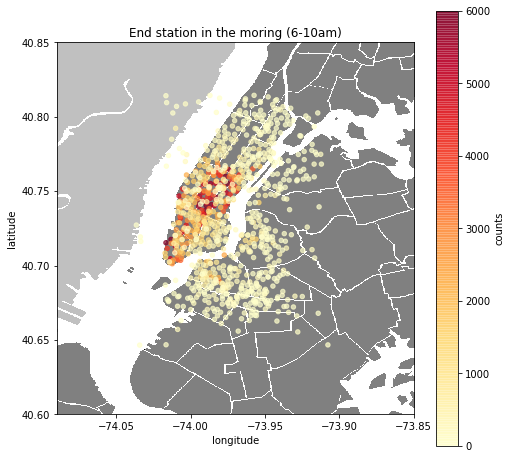

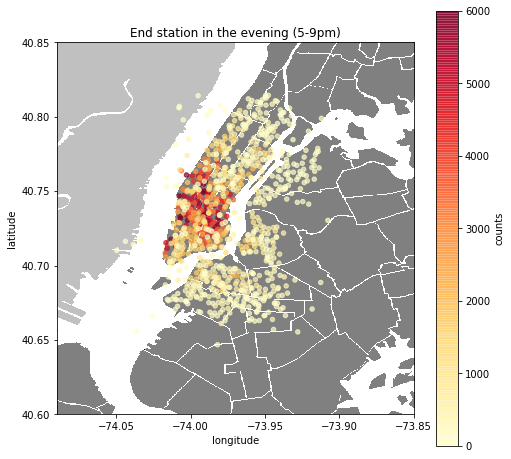

In [43]:
import urllib
plt.figure(figsize=(8,8))

i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
NYC_image = plt.imread(i)

plt.imshow(NYC_image,extent=[-74.254159, -73.696215, 40.493992, 40.913568])
ax = plt.gca()

mynorm1 = plt.Normalize(vmin=0, vmax=6000)
df_5M_Weekdays_Morning_end_cts[condition].plot(kind='scatter',x='longitude', y='latitude',c='counts',cmap='YlOrRd',ax=ax,alpha=0.7,norm=mynorm1)
plt.title('End station in the moring (6-10am)')
plt.xlim(-74.09,-73.85)
plt.ylim(40.60,40.85)
plt.show()


plt.figure(figsize=(8,8))

i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
NYC_image = plt.imread(i)

plt.imshow(NYC_image,extent=[-74.254159, -73.696215, 40.493992, 40.913568])
ax = plt.gca()

mynorm1 = plt.Normalize(vmin=0, vmax=6000)
df_5M_Weekdays_Evening_end_cts[condition].plot(kind='scatter',x='longitude', y='latitude',c='counts',cmap='YlOrRd',ax=ax,alpha=0.7,norm=mynorm1)
plt.title('End station in the evening (5-9pm)')
plt.xlim(-74.09,-73.85)
plt.ylim(40.60,40.85)
plt.show()



Look that employees in Man tends to use Citibike more afterwork than going to works